In [1]:
import os
os.chdir("D:/One Drive/My Portfolio/Face Recognition")

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

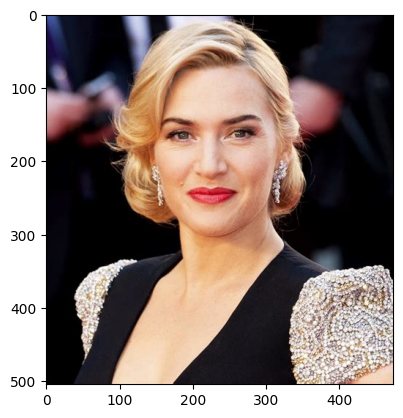

In [3]:
img = cv.imread(r"data/raw/Kate Winslet/017_fb53f84d.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

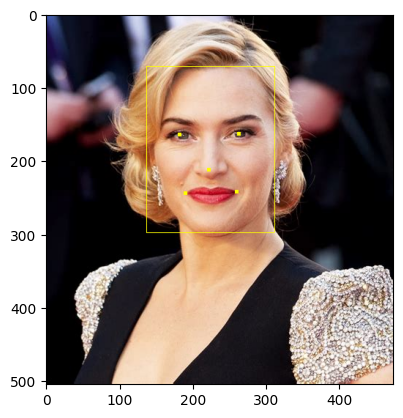

In [4]:
from mtcnn import MTCNN
from mtcnn.utils.plotting import plot

mtcnn = MTCNN()

result = mtcnn.detect_faces(img)

plt.imshow(plot(img, result))
plt.show()

In [15]:
path_dataset = 'data/raw'
path_dataset_faces = 'data/processed'

In [16]:
img_dirs =[]
for entry in os.scandir(path_dataset):
  if entry.is_dir():
    img_dirs.append(entry.path)
img_dirs

['data/raw\\Denzel Washington',
 'data/raw\\Kate Winslet',
 'data/raw\\Leonardo DiCaprio',
 'data/raw\\Natalie Portman',
 'data/raw\\Robert Downey Jr']

In [25]:
def extract_face(img_path):
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    mtcnn = MTCNN()
    result = mtcnn.detect_faces(img)
    if len(result) == 0:
        return None
    x, y, w, h = result[0]['box']
    x, y = abs(x), abs(y)  
    face = img[y:y+h, x:x+w]
    face = cv.resize(face, (160, 160))
    face = cv.cvtColor(face, cv.COLOR_RGB2BGR)
    return face

In [26]:
faces_img_dirs = []
celeb_files_name_dict = {}

for img_dir in img_dirs:
    i = 1
    celeb_name = os.path.basename(img_dir)
    print(celeb_name)

    face_dataset_folder = os.path.join(path_dataset_faces, celeb_name)
    if not os.path.exists(face_dataset_folder):
        os.makedirs(face_dataset_folder)
        print("Generating face images in folder:", face_dataset_folder)

    if face_dataset_folder not in faces_img_dirs:
        faces_img_dirs.append(face_dataset_folder)

    celeb_files_name_dict[celeb_name] = []

    for entry in os.scandir(img_dir):
        if entry.is_file():
            face = extract_face(entry.path)

            if face is not None:
                face_file_name = celeb_name + str(i) + '.png'
                face_file_path = os.path.join(face_dataset_folder, face_file_name)

                if not os.path.exists(face_file_path):
                    cv.imwrite(face_file_path, face)
                    celeb_files_name_dict[celeb_name].append(face_file_path)
                else:
                    print(f"File {face_file_path} already exists.")
                i += 1

Denzel Washington
Generating face images in folder: data/processed\Denzel Washington
Kate Winslet
Generating face images in folder: data/processed\Kate Winslet
Leonardo DiCaprio
Generating face images in folder: data/processed\Leonardo DiCaprio
Natalie Portman
Generating face images in folder: data/processed\Natalie Portman
Robert Downey Jr
Generating face images in folder: data/processed\Robert Downey Jr
